In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks',
              rc={'axes.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams, colors, cm
import matplotlib.patches as mpatches
rcParams['font.family'] = 'sans-serif'
rcParams['figure.dpi'] = 150

In [2]:
import os
import warnings
import itertools
import numpy as np
import pandas as pd
from scipy import stats
from pyfish import fish_plot, process_data
# local import
from utils import read_mi, enrichment
from utils import ml_metrics, get_rbd_mutated
from utils import AFFINITY, ESCAPE, MOI

In [3]:
INTERESTING = set(MOI).union(AFFINITY).union(ESCAPE)

In [4]:
print(INTERESTING)

{18, 403, 406, 417, 681, 439, 440, 446, 447, 449, 452, 455, 456, 477, 484, 489, 493, 494, 496, 498, 501, 505, 506}


In [5]:
df = []
d_mutated = {}
all_mutated = set()
for name in sorted(os.listdir('../out/update/time-filtered-subsets/')):
    try:
        df.append(read_mi(f'../out/update/time-filtered-subsets/{name}/mi_annotated.tsv.gz',
                          name,
                          date=True))
        mutated = get_rbd_mutated('../out/update/time-filtered-lineages/',
                                  names=[name,])
        d_mutated[name] = mutated.union(all_mutated)
        all_mutated = mutated.union(all_mutated)
    except FileNotFoundError:
        pass
df = pd.concat(df)

In [6]:
LAST_DATE = df['name'].sort_values().values[-1]

LAST_DATE

'2023-08'

In [7]:
df.groupby(['year', 'month'])['pos_source'].count()

year  month
2020  3        79586
      4        75912
      5        67722
      6        71006
      7        57336
      8        50200
      9        44790
      10       38936
      11       22166
      12       18520
2021  1        18588
      2        11238
      3         8580
      4         8426
      5         9292
      6         7392
      7         5938
      8         5216
      9         4906
      10        8374
      11        6498
      12        3538
2022  1         3004
      2         1654
      3         1204
      4          652
      5          516
      6          516
      7          488
      8          572
      9          622
      10         570
      11         682
      12         558
2023  1          578
      2          594
      3          730
      4          940
      5          568
      6          964
      7         1696
      8         1648
Name: pos_source, dtype: int64

In [8]:
count = df.groupby(['name', 'outlier'])['pos_source'].count().reset_index()

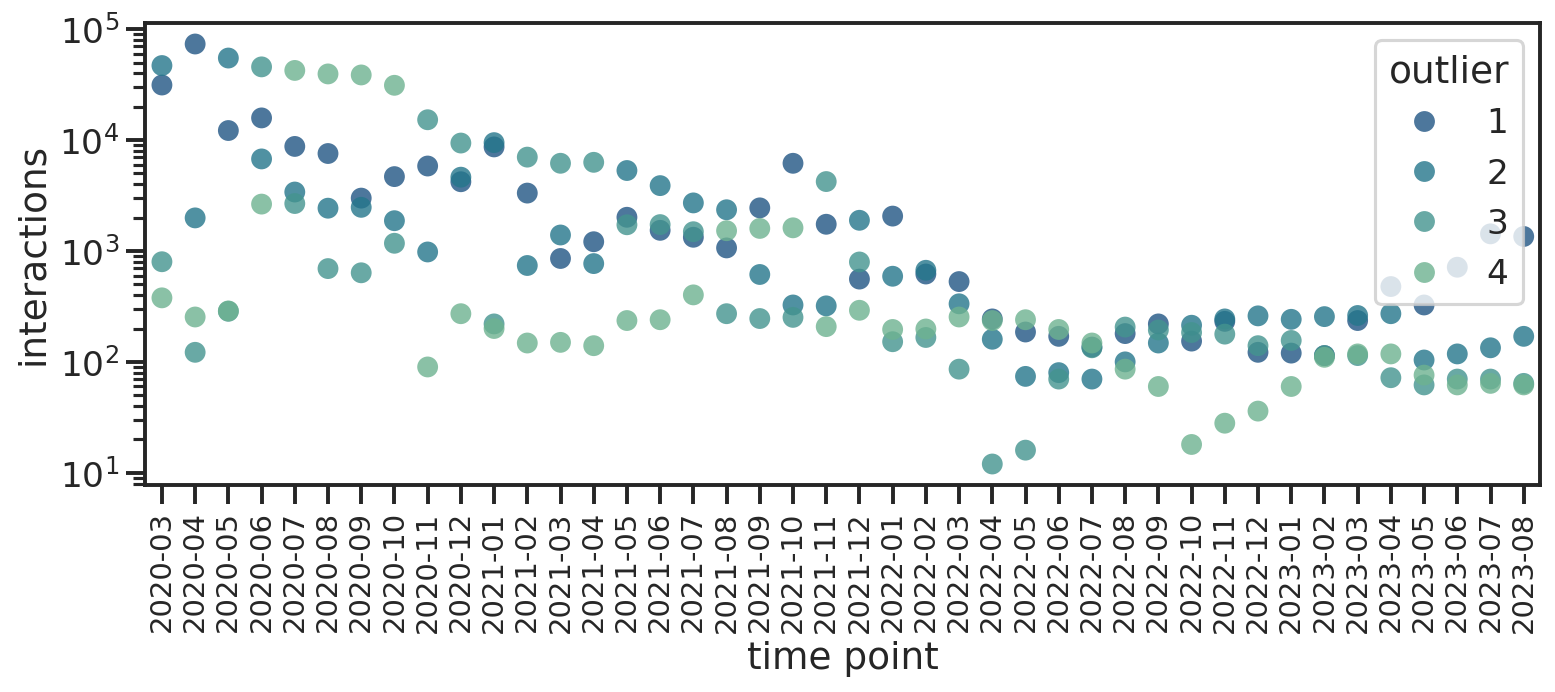

In [9]:
plt.figure(figsize=(12, 4))

sns.stripplot(data=count,
              y='pos_source',
              x='name',
              hue='outlier',
              size=10,
              jitter=0,
              alpha=0.8,
              palette=sns.color_palette('crest_r', 4))

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w',
           title='outlier')

plt.ylabel('interactions')
plt.xlabel('time point')

plt.yscale('log')

plt.savefig('update_1.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_1.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [10]:
dist = df.groupby(['name', 'outlier'])['distance'].mean().reset_index()

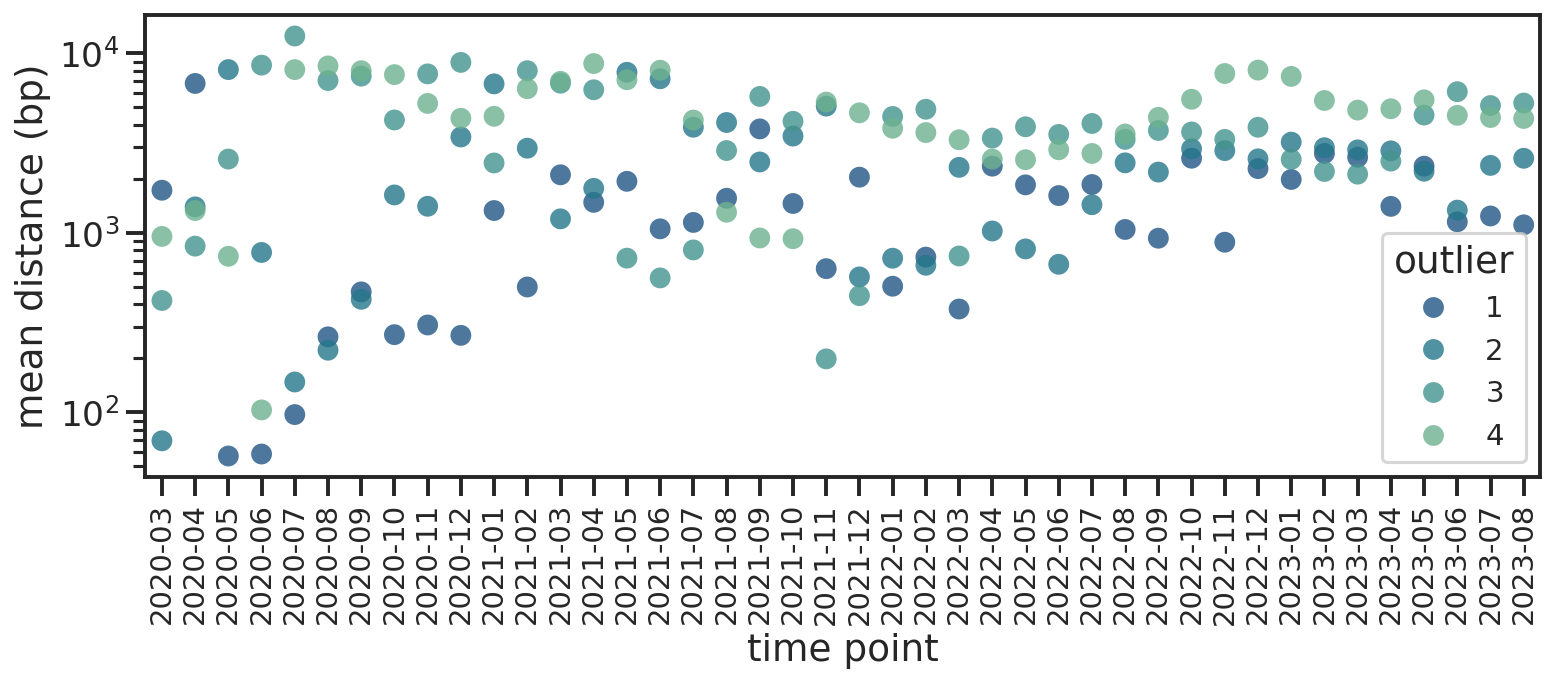

In [11]:
plt.figure(figsize=(12, 4))

sns.stripplot(data=dist,
              y='distance',
              x='name',
              hue='outlier',
              size=10,
              jitter=0,
              alpha=0.8,
              palette=sns.color_palette('crest_r', 4))

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w',
           title='outlier',
           fontsize=14)

plt.ylabel('mean distance (bp)')
plt.xlabel('time point')

plt.yscale('log')

plt.savefig('update_2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_2.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [12]:
dist = df.groupby(['name', 'outlier'])['distance'].median().reset_index()

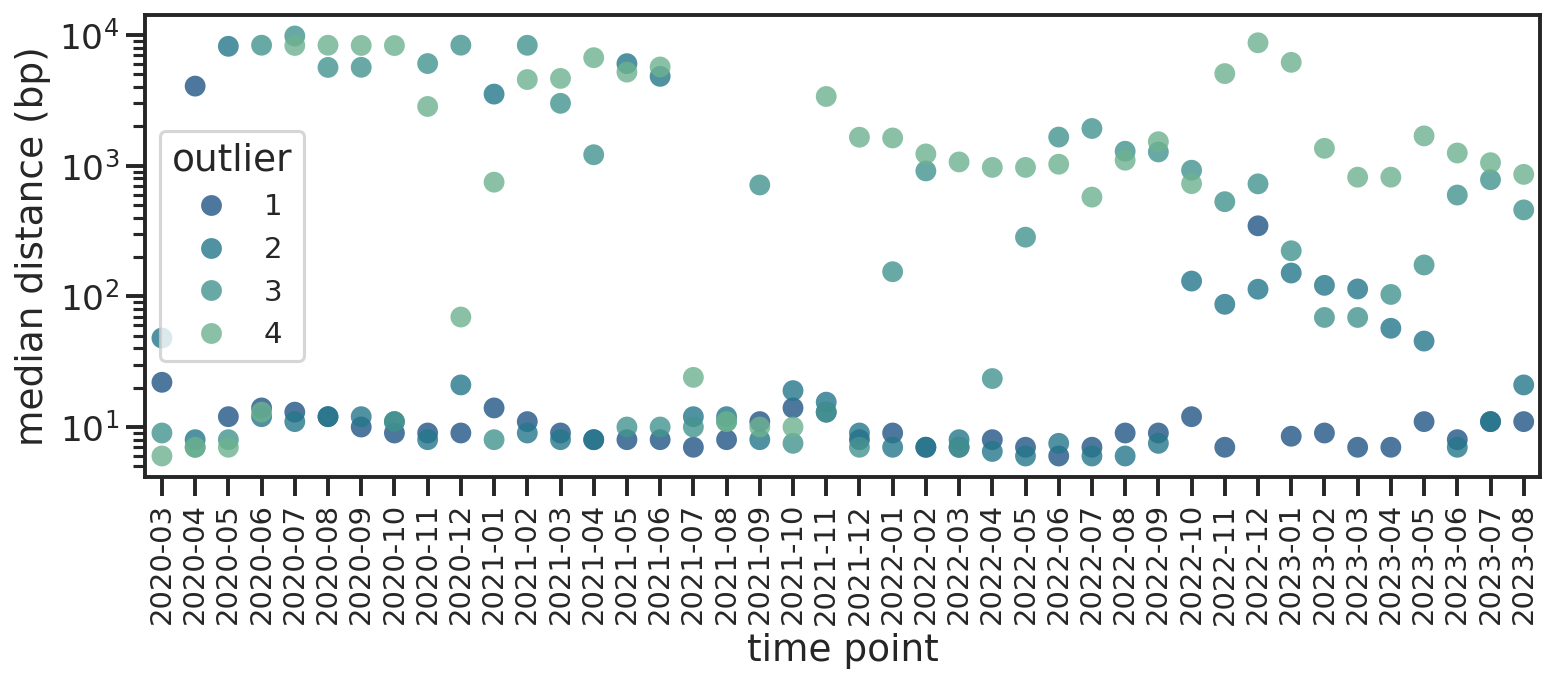

In [13]:
plt.figure(figsize=(12, 4))

sns.stripplot(data=dist,
              y='distance',
              x='name',
              hue='outlier',
              size=10,
              jitter=0,
              alpha=0.8,
              palette=sns.color_palette('crest_r', 4))

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w',
           title='outlier',
           fontsize=14)

plt.ylabel('median distance (bp)')
plt.xlabel('time point')

plt.yscale('log')

plt.savefig('update_3.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_3.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [14]:
s1 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'] == 501) &
         (df['feature_codon_target'] == 498))].copy()

s1 = s1.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            # '2020-03'
                                                                           ])]['name'].unique()))

/tmp/ipykernel_1021691/3519535378.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s1 = s1.pivot_table(index=['feature_codon_source',


In [15]:
s2 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(AFFINITY)) &
         (df['feature_codon_target'].isin(INTERESTING.difference(AFFINITY))))].copy()

s2 = s2.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            # '2020-03'
                                                                           ])]['name'].unique()))

/tmp/ipykernel_1021691/2957869232.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s2 = s2.pivot_table(index=['feature_codon_source',


In [16]:
s3 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(INTERESTING.difference(AFFINITY))) &
         (df['feature_codon_target'].isin(INTERESTING.difference(AFFINITY))))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[~df['name'].isin(['2020-02',
                                                                            # '2020-03'
                                                                           ])]['name'].unique()))

/tmp/ipykernel_1021691/4152375240.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [17]:
s = pd.concat([s1, s2])

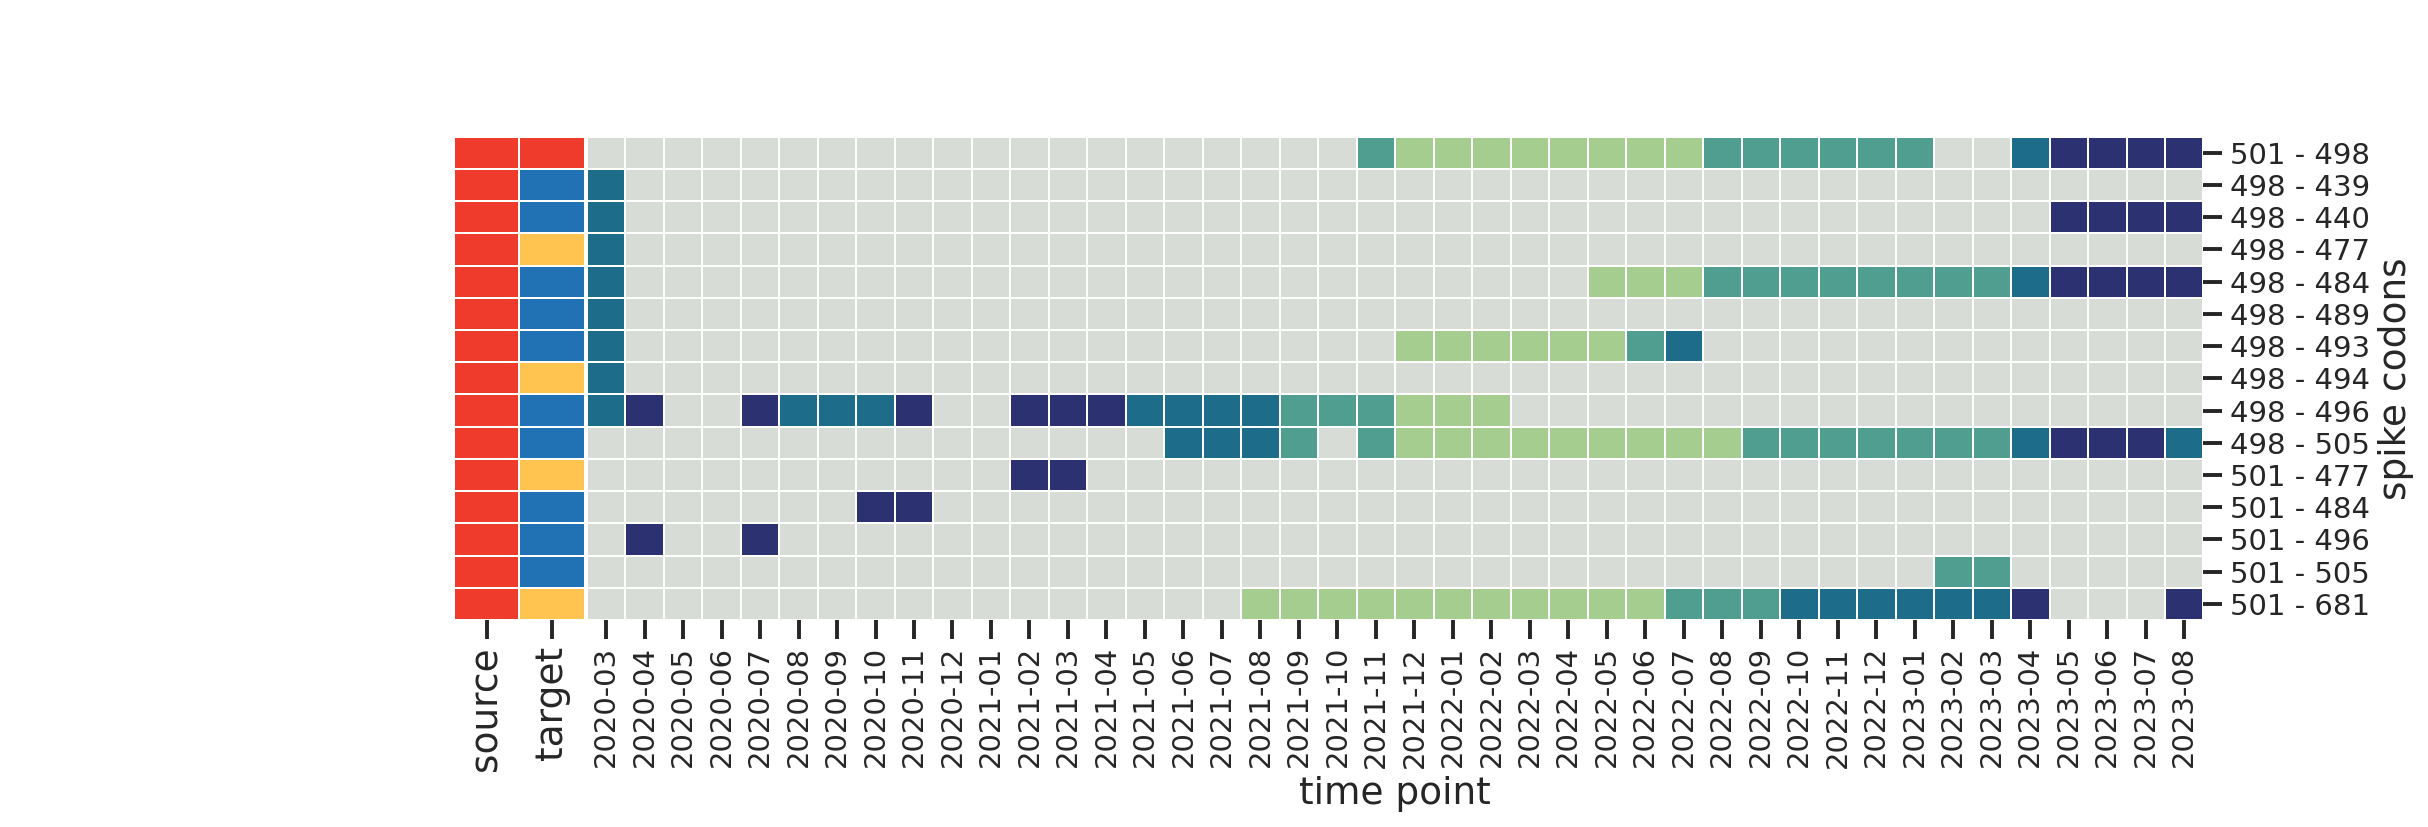

In [18]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 6),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=14)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_4.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_4.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [19]:
s3 = df[(df['year'] > 2020) &
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        (df['feature_codon_source'].isin(INTERESTING))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_1021691/2047885515.py:8: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [20]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

s = s.loc[s[[LAST_DATE]].dropna().index]

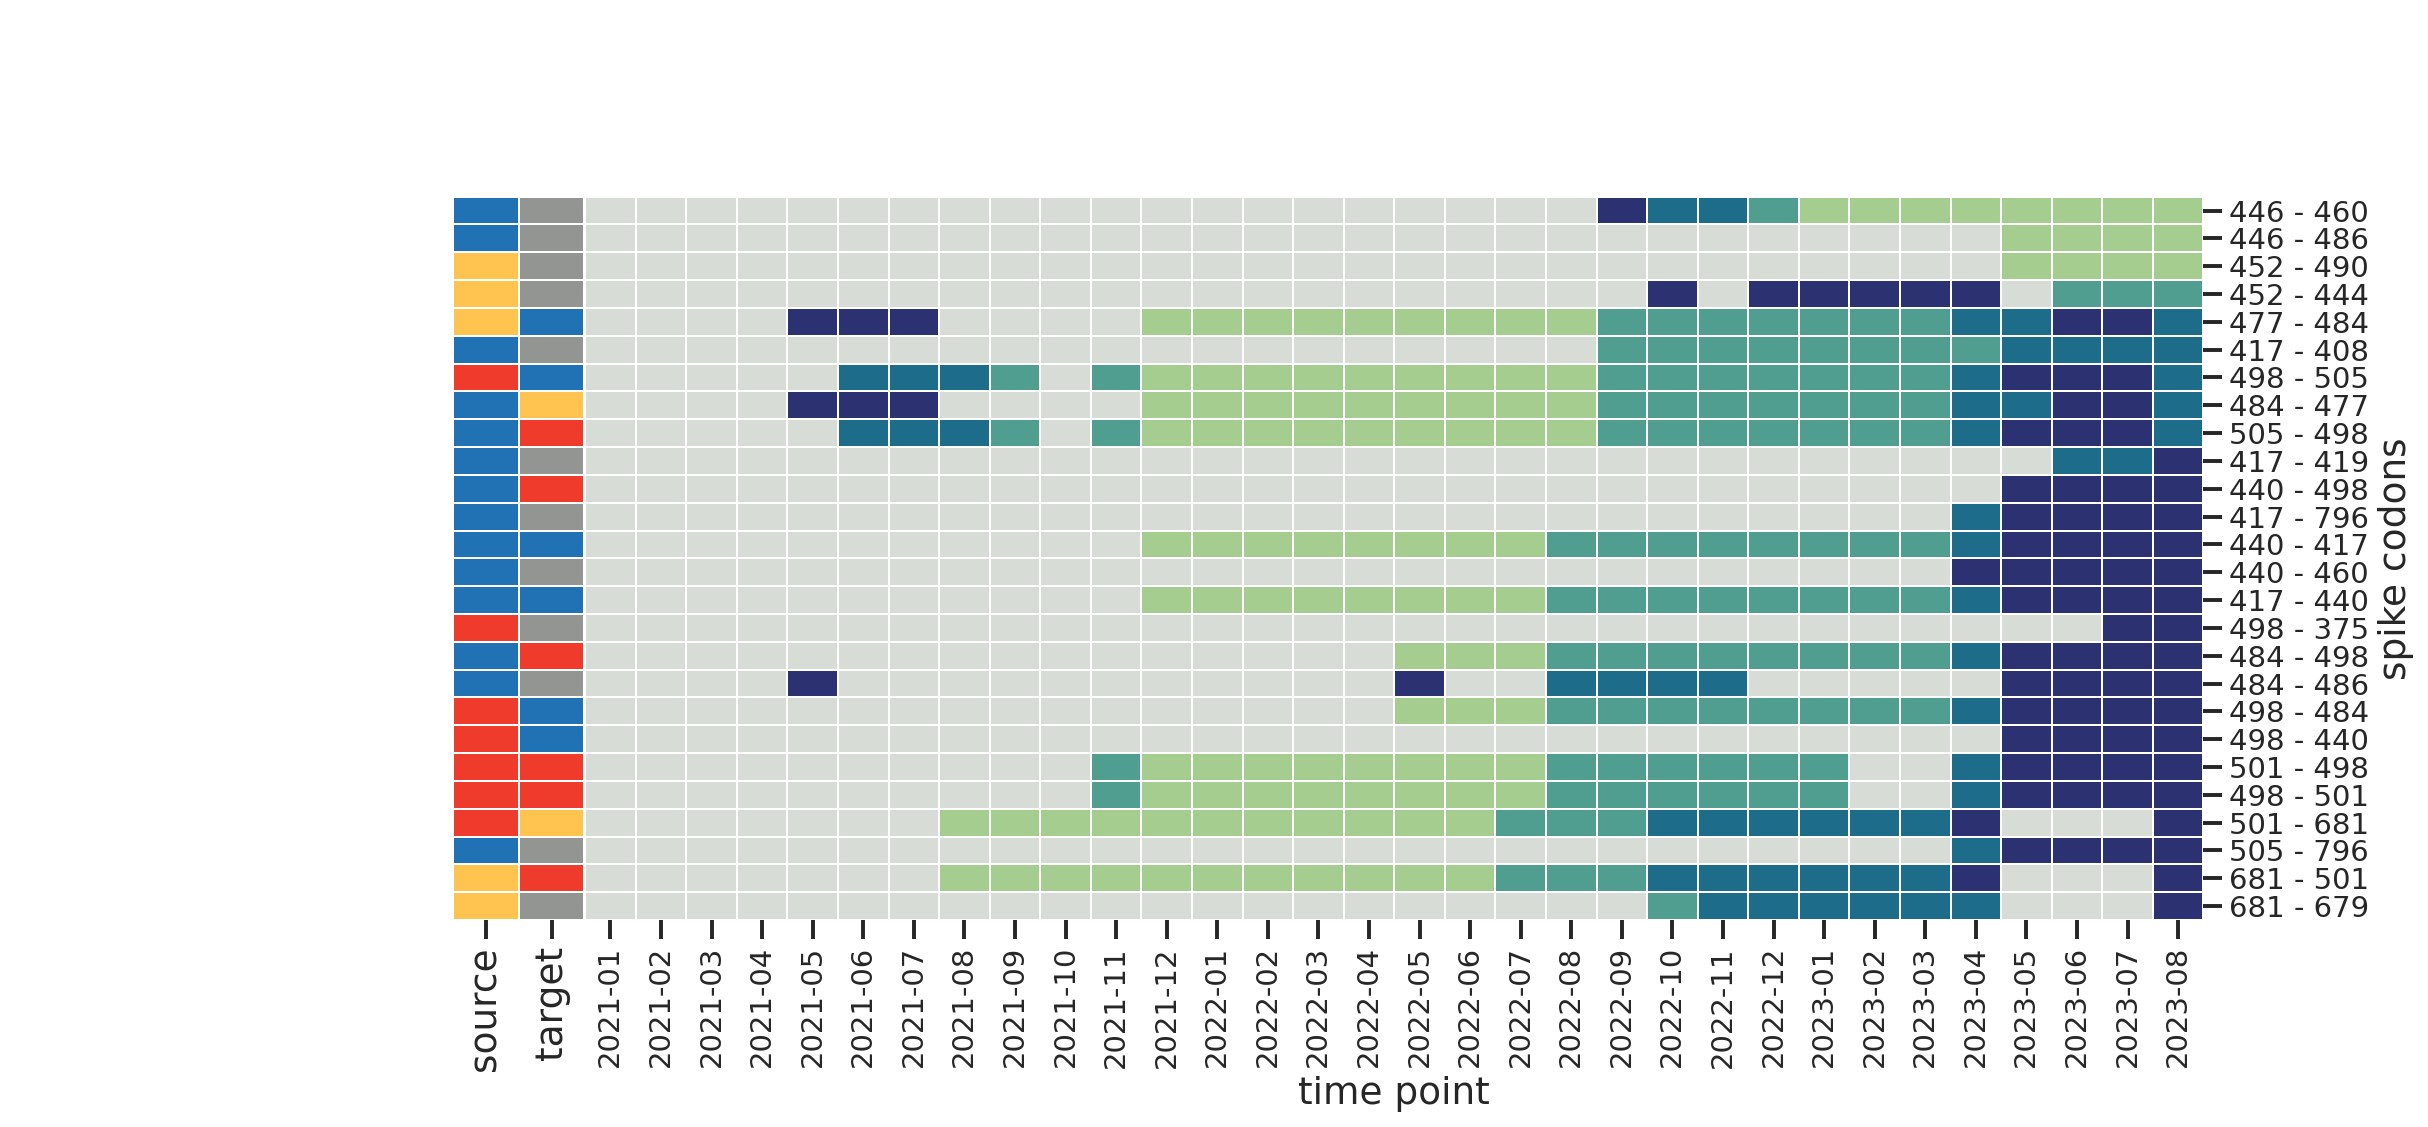

In [21]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 8),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=14)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_5.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_5.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [22]:
s3 = df[(df['year'] > 2020) &
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        (df['outlier'] > 2)].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_1021691/3437337660.py:8: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [23]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

s = s.loc[s[[LAST_DATE]].dropna().index]
idx = s.index

In [24]:
s3 = df[(df['year'] > 2020) &
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S')].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_1021691/935157653.py:7: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [25]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

s = s.loc[idx]

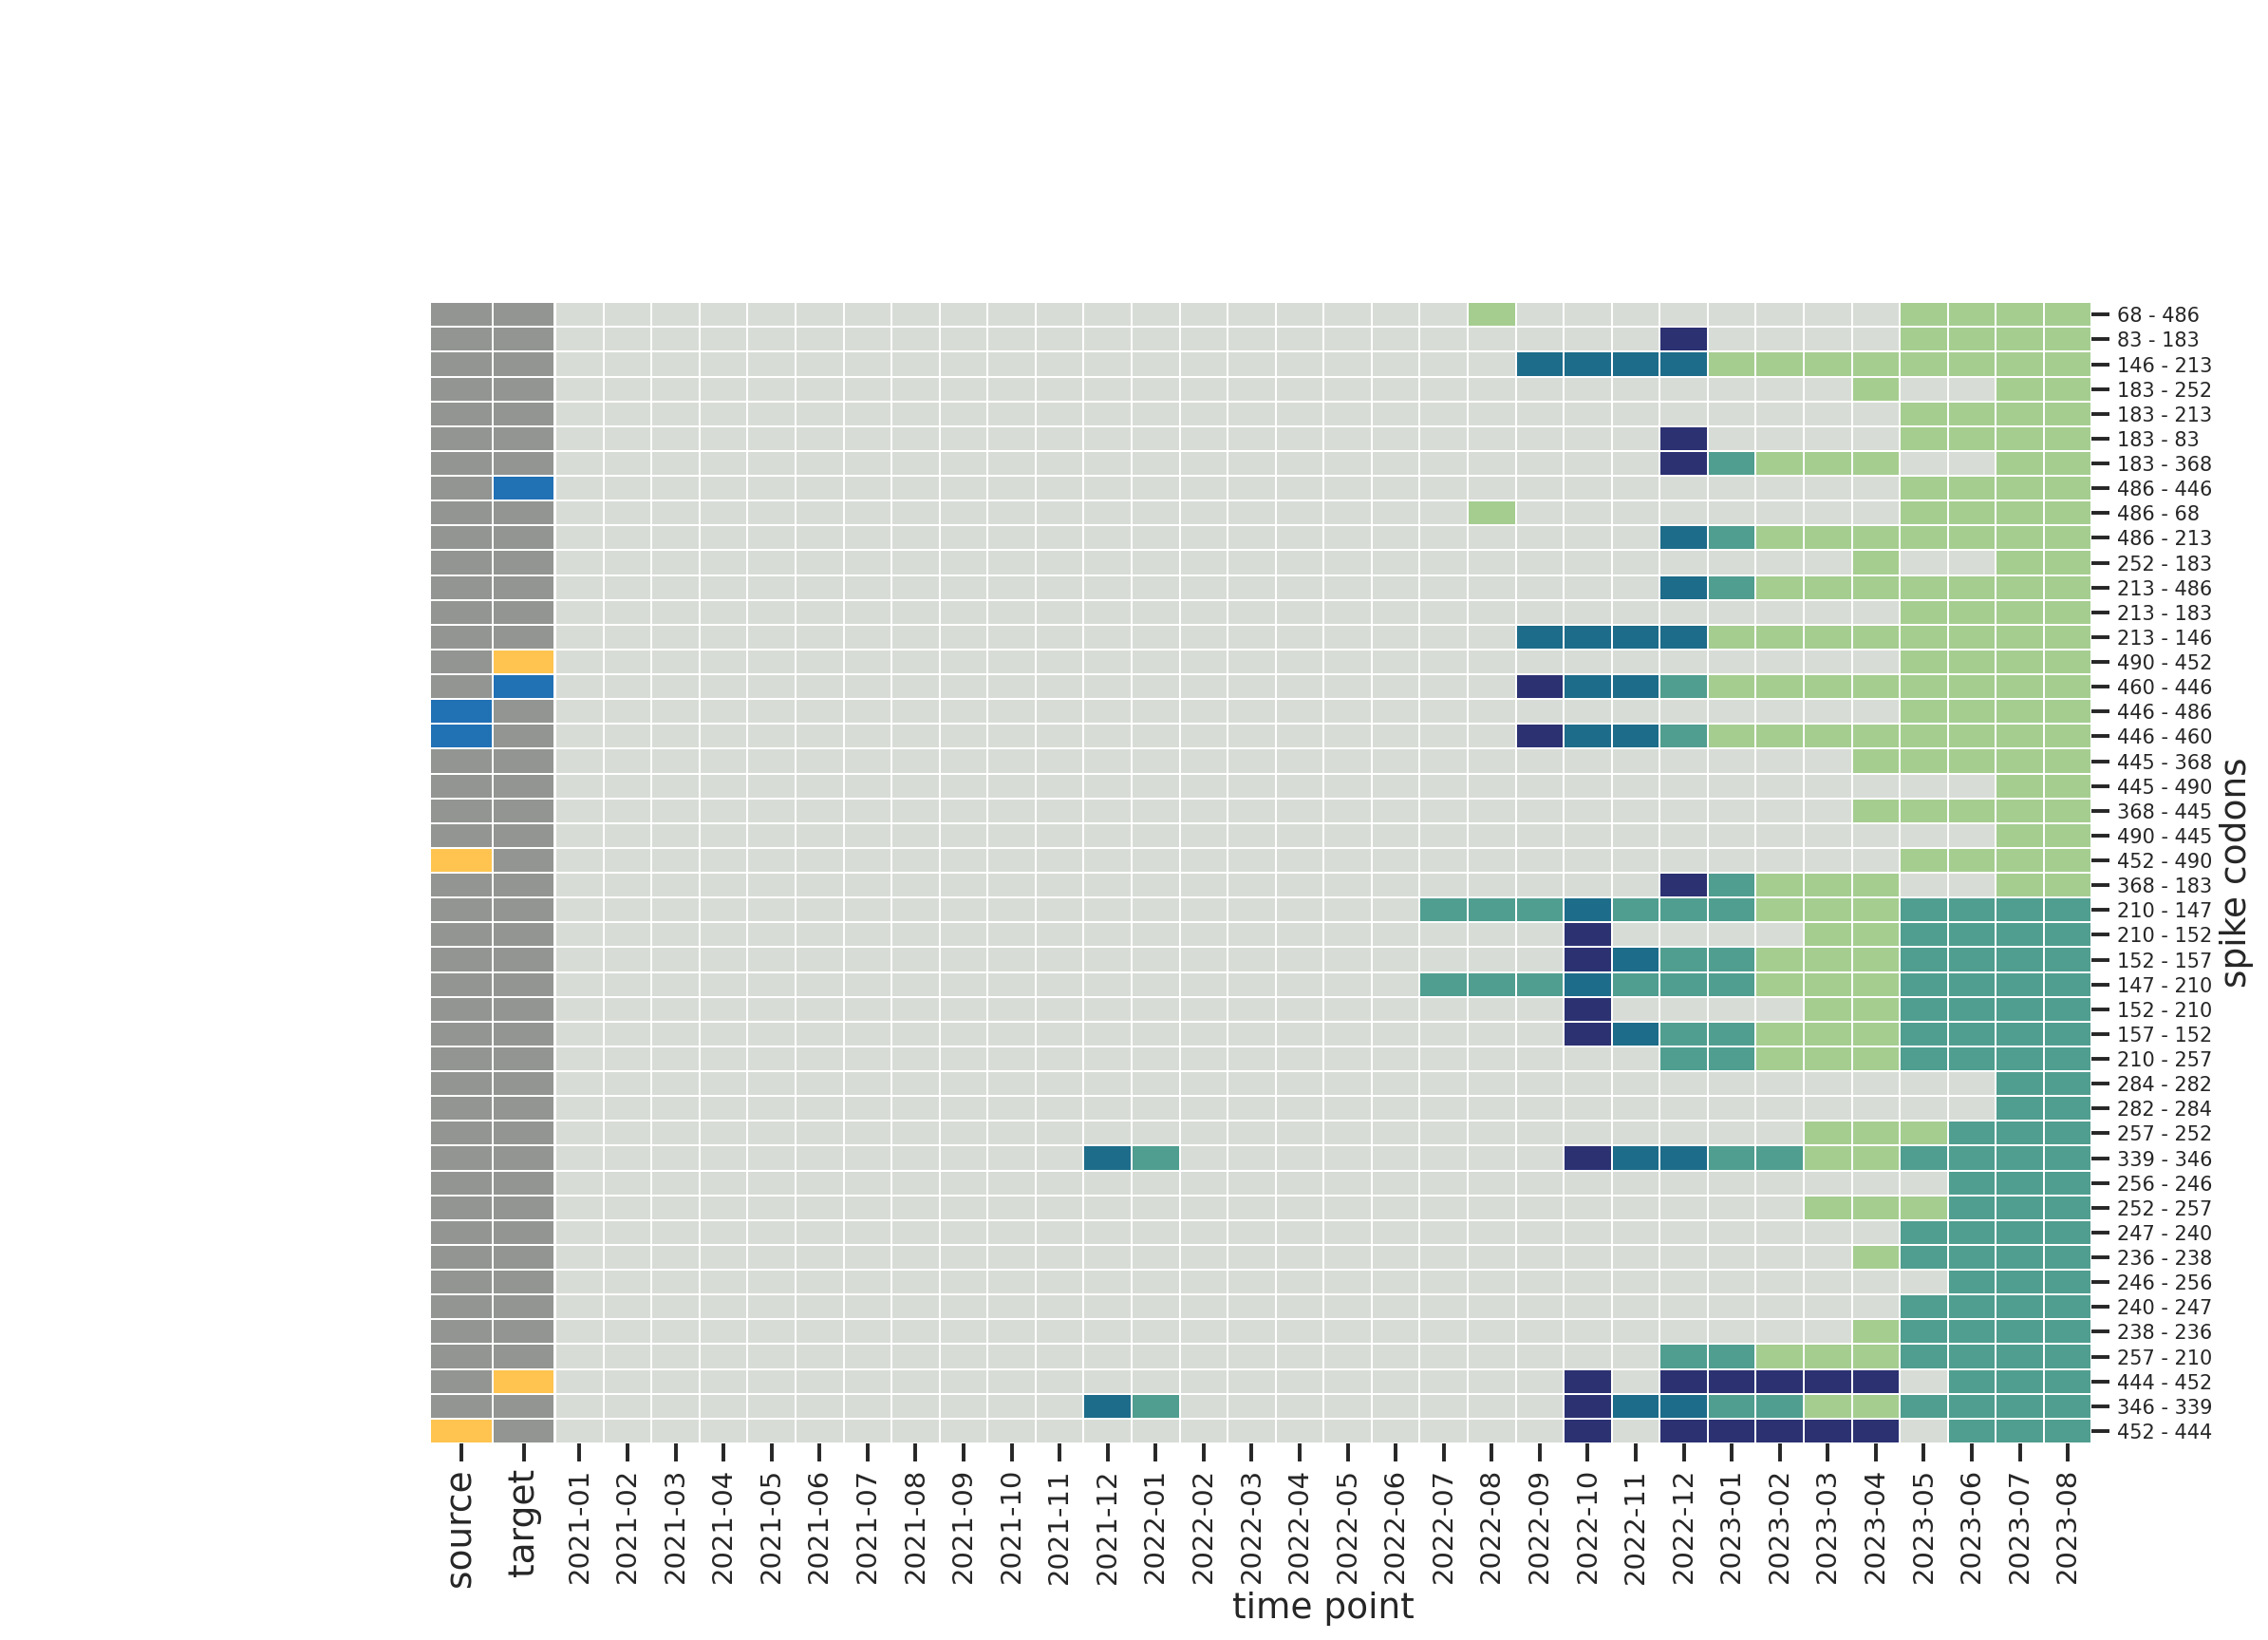

In [26]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 12),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=10)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_6.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_6.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [27]:
follow_up_positions = {446, 452, 460, 486, 490, 498, 501}

In [28]:
df['pair'] = ['%d-%d' % (x, y) 
              if str(x) != 'nan'
              and str(y) != 'nan'
              else np.nan
              for x, y in df[['feature_codon_source',
                              'feature_codon_target']].values]

In [29]:
s3 = df[(~df['name'].isin(['2020-02',
                           # '2020-03'
                          ])) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        ((df['feature_codon_source'].isin(follow_up_positions)) &
         (df['feature_codon_target'].isin(follow_up_positions)))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(df[(df['year'] > 2020) #&
        # (~df['name'].isin([f'2021-{x:02d}'
        #                    for x in range(1, 11)]))
                                                       ]['name'].unique()))

/tmp/ipykernel_1021691/2390098090.py:9: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [30]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

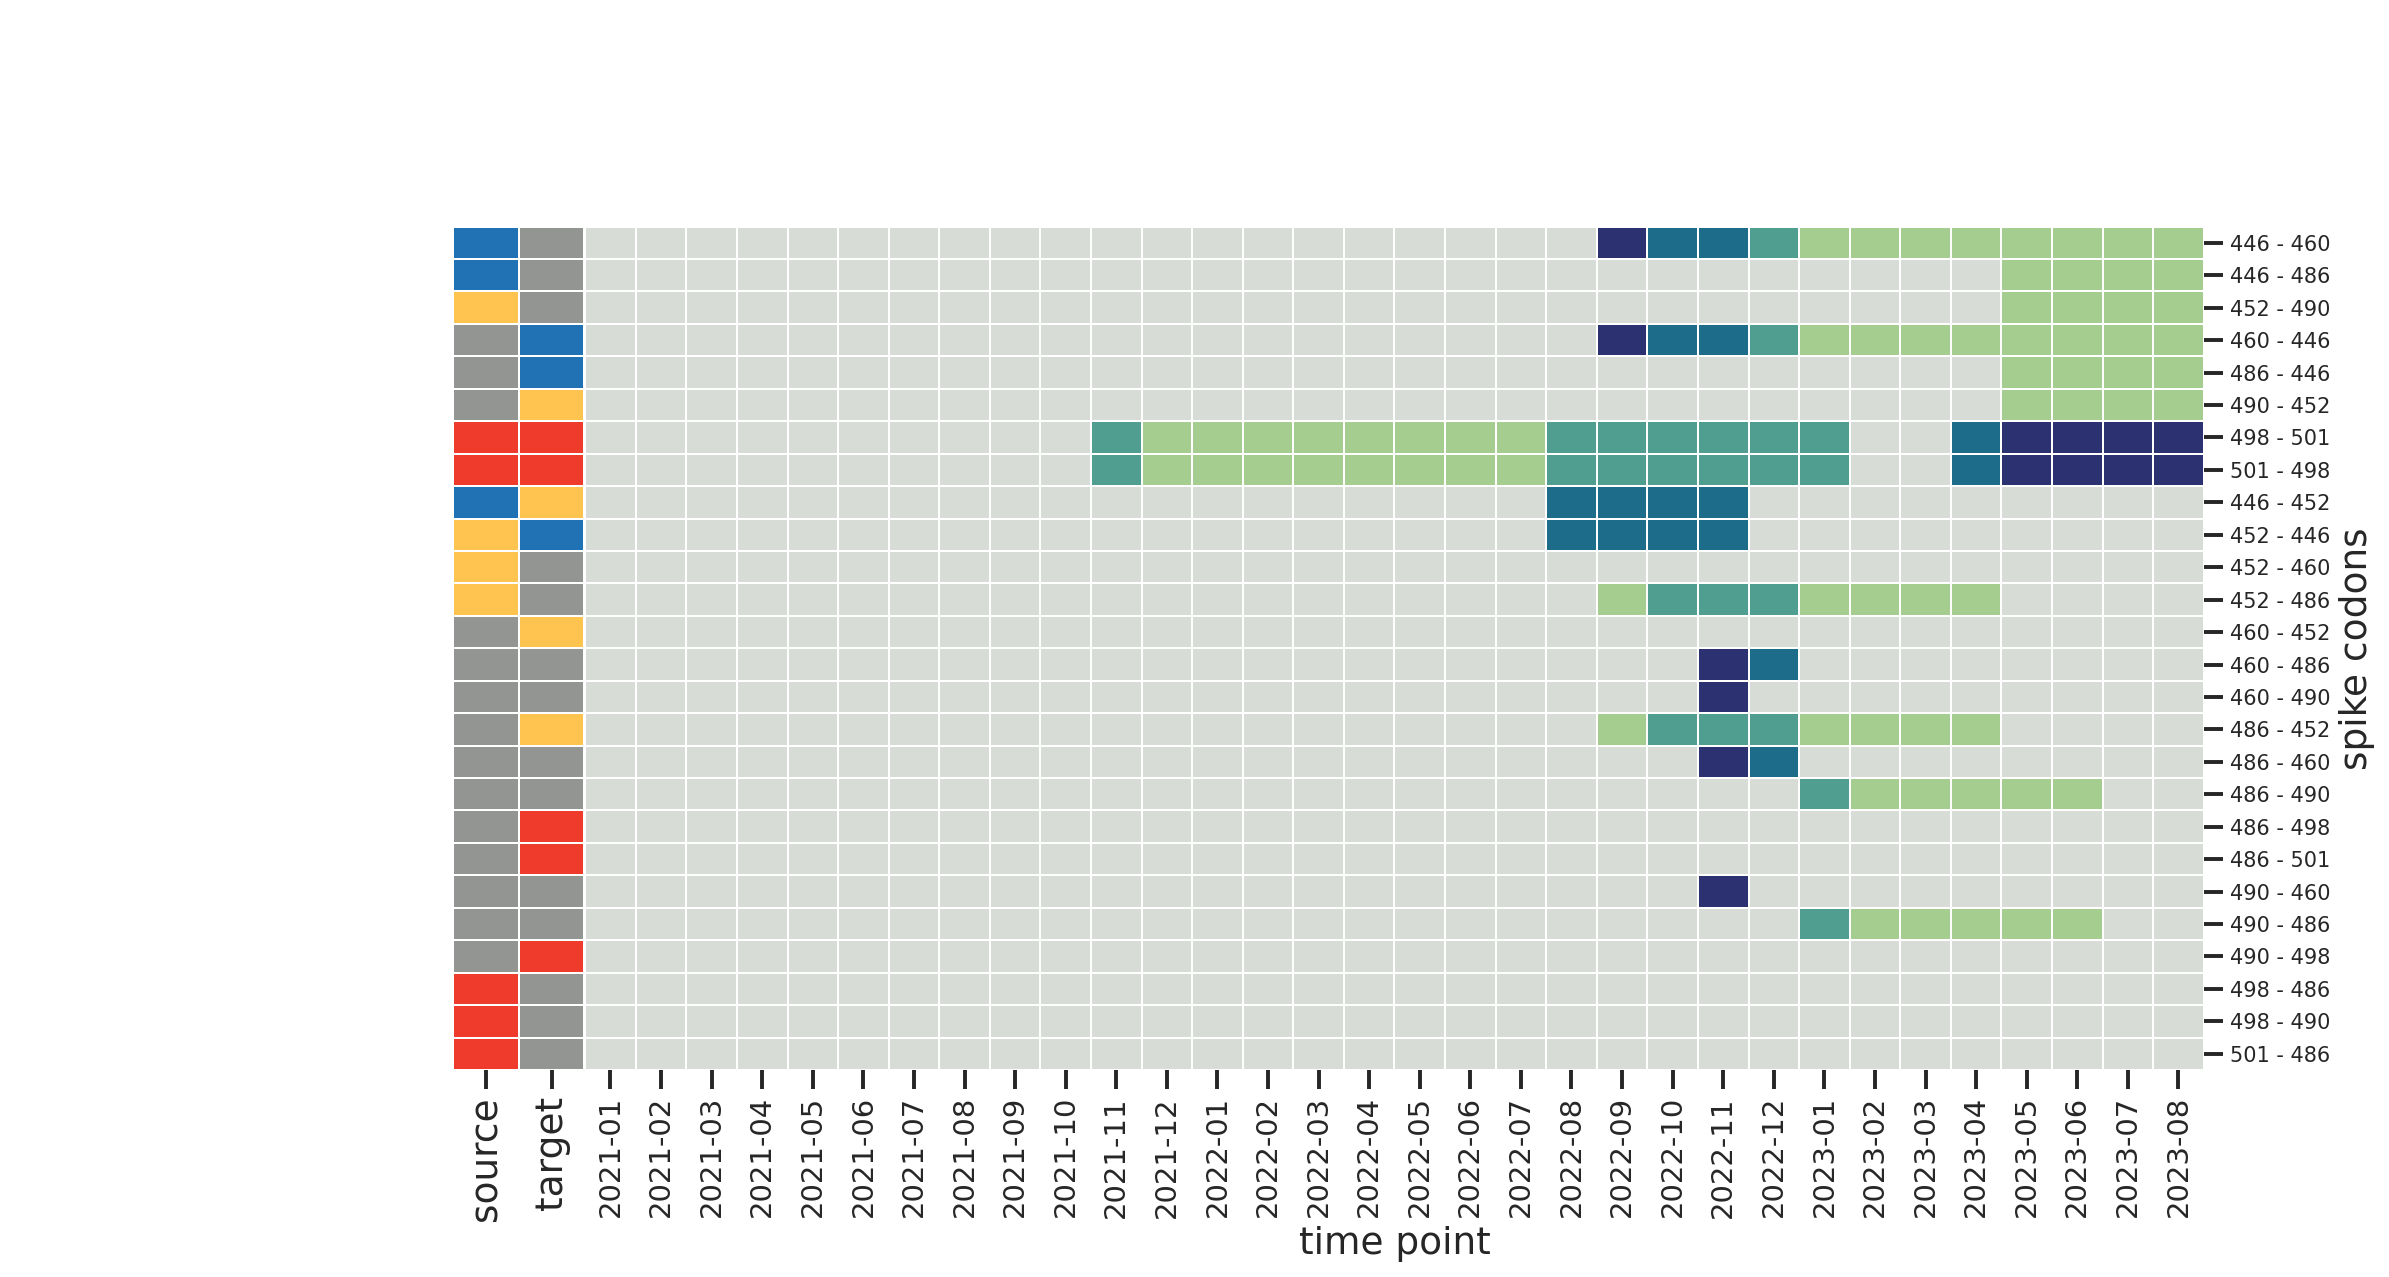

In [31]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(17, 9),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=10)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_6a.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_6a.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [32]:
follow_up_pairs = {'446-486', '446-460',
                   '452-490', '498-501'}

In [33]:
months = [f'{year}-{month:02d}' for year, month in zip(['2021'] * 3 + ['2022'] * 12 + ['2023'] * 8,
                                                       list(range(10, 13)) + list(range(1, 13)) + list(range(1, 9)))]

In [34]:
df['name'].unique()

array(['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02',
       '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08'],
      dtype=object)

In [35]:
s3 = df[(df['name'].isin(months)) &
        (df['gene_source'] == 'S') &
        (df['gene_target'] == 'S') &
        (df['pair'].isin(follow_up_pairs))].copy()

s3 = s3.pivot_table(index=['feature_codon_source',
                          'feature_codon_target'],
                   columns='name',
                   values='outlier',
                   aggfunc=max).reindex(columns=sorted(months))

/tmp/ipykernel_1021691/3178853966.py:6: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  s3 = s3.pivot_table(index=['feature_codon_source',


In [36]:
s = s3

s = s.sort_values(LAST_DATE, ascending=False)

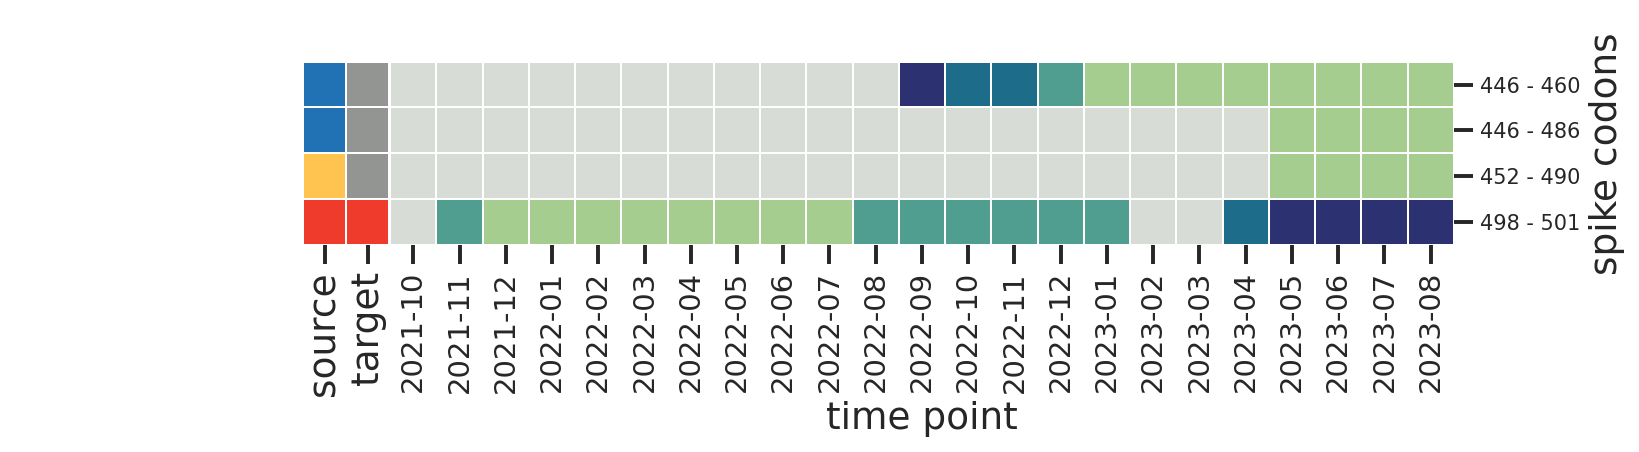

In [37]:
cmap = plt.get_cmap('crest_r').copy()
cmap.set_bad('xkcd:light grey')

colors1 = []
colors2 = []
for x, y in s.index:
    if x in AFFINITY:
        colors1.append('#ef3b2cff')
    elif x in ESCAPE:
        colors1.append('#2171b5ff')
    elif x in MOI:
        colors1.append('#fec44fff')
    else:
        colors1.append('xkcd:grey')

    if y in AFFINITY:
        colors2.append('#ef3b2cff')
    elif y in ESCAPE:
        colors2.append('#2171b5ff')
    elif y in MOI:
        colors2.append('#fec44fff')
    else:
        colors2.append('xkcd:grey')

cm = sns.clustermap(s, cmap=cmap,
                    row_cluster=False, col_cluster=False,
                    row_colors=pd.DataFrame([[a, b] for a, b in zip(colors1, colors2)],
                                            columns=['source', 'target'],
                                            index=s.index),
                    linewidths=0.005,
                    cbar_pos=None,
                    figsize=(12, 3.5),
                    vmin=1, vmax=4)

cm.ax_heatmap.set_xlabel('time point')
cm.ax_heatmap.set_ylabel('spike codons')

cm.ax_heatmap.set_xticks([x + 0.5 for x in range(s.shape[1])],
                         s.columns,
                         fontsize=14)
cm.ax_heatmap.set_yticks([x + 0.5 for x in range(s.shape[0])],
                         [f'{int(x)} - {int(y)}' for x, y in s.index],
                         fontsize=10)

cm.ax_row_colors.set_xticks([0.5, 1.5],
                            ['source', 'target'],
                            fontsize=18)

plt.savefig('update_6b.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_6b.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [38]:
res = []

d = {}
cw = {}
clades = {}

for f in s3.columns:
    l = pd.read_csv(f'../out/update/time-lineages/{f}.tsv', sep='\t',
                    usecols=['seqName', 'clade', 'Nextclade_pango',
                             'partiallyAliased', 'clade_nextstrain',
                             'clade_who', 'clade_display'])
    date = f.split('.')[0]
    year = int(date.split('-')[0])
    month = int(date.split('-')[1])

    tmp = l.set_index('clade_display')['clade_who'].dropna().to_dict()
    for k, v in tmp.items():
        d[k] = v
        cw[v] = cw.get(v, set())
        cw[v].add(k)
        clades[v] = clades.get(v, [])
        if k not in clades[v]:
            clades[v].append(k)
    
    l = l.groupby('clade_display')['seqName'].count().reset_index()
    l = l.rename(columns={'seqName': 'count'})
    l['name'] = date
    l['year'] = year
    l['month'] = month

    res.append(l)
r = pd.concat(res)

In [39]:
rr = r.pivot_table(index='clade_display',
                   columns='name',
                   values='count')
rr = rr.fillna(0)
rr = rr / rr.sum()
rr.T.to_csv('clades.tsv', sep='\t')

In [40]:
r['clade_display'].unique()

array(['21A (Delta)', '21I (Delta)', '21J (Delta)', '21K (BA.1)',
       '21L (BA.2)', '22C (BA.2.12.1)', '22B (BA.5)', '22A (BA.4)', '20A',
       '22D (BA.2.75)', '20I (Alpha)', 'recombinant', '22E (BQ.1)',
       '22F (XBB)', '23A (XBB.1.5)', '23C (CH.1.1)', '23D (XBB.1.9)',
       '23B (XBB.1.16)', '23E (XBB.2.3)', '23F (EG.5.1)'], dtype=object)

In [41]:
clades

{'Delta': ['21J (Delta)', '21I (Delta)', '21A (Delta)'],
 'Omicron': ['21K (BA.1)',
  '21L (BA.2)',
  '22C (BA.2.12.1)',
  '22B (BA.5)',
  '22A (BA.4)',
  '22D (BA.2.75)',
  '22E (BQ.1)',
  '22F (XBB)',
  '23D (XBB.1.9)',
  '23C (CH.1.1)',
  '23A (XBB.1.5)',
  '23B (XBB.1.16)',
  '23E (XBB.2.3)',
  '23F (EG.5.1)'],
 'recombinant': ['recombinant'],
 'Alpha': ['20I (Alpha)']}

In [42]:
dl = {x: i+1 for i, x in enumerate(r['clade_display'].unique())}

In [43]:
dt = {x: i for i, x in enumerate(sorted(r['name'].unique()))}

In [44]:
dw = {x: i+1 for i, x in enumerate(d)}

In [45]:
res = []
for clade in r['clade_display'].unique():
    t = r[r['clade_display'] == clade].sort_values('name')
    for name, count in t[['name', 'count']].values:
        res.append([dl[clade], dt[name], count, d.get(clade, np.nan), clade])
df1 = pd.DataFrame(res,
                   columns=['Id', 'Step', 'Pop', 'VOC', 'clade'])

In [46]:
cw = {k: len(v) for k, v in cw.items()}

In [47]:
cw

{'Delta': 3, 'Omicron': 14, 'recombinant': 1, 'Alpha': 1}

In [48]:
voc = {'Alpha': 'xkcd:pale red',
       'Beta': 'xkcd:sea blue',
       'Delta': {x: c for c, x in zip(
           sns.color_palette('Purples', len(clades['Delta'])+2)[2:],
           sorted(clades['Delta']))},
       'Epsilon': 'xkcd:grey',
       'Eta': 'xkcd:grey',
       'Gamma': 'xkcd:grey',
       'Iota': 'xkcd:grey',
       'Kappa': 'xkcd:grey',
       'Lambda': 'xkcd:grey',
       'Mu': 'xkcd:grey',
       'Omicron': {x: c for c, x in zip(
           sns.color_palette('Oranges', len(clades['Omicron'])+2)[2:],
           sorted(clades['Omicron']))},
       'Theta': 'xkcd:grey',
       'recombinant': 'xkcd:grey'}

In [49]:
cmap = plt.get_cmap('tab20').copy()
cmap.set_bad('grey')
data = process_data(df1, pd.DataFrame([(0, i) for i in df1['Id'].unique()],
                                      columns=['ParentId',
                                               'ChildId']),
                    cmap_name='tab20b')

for i in df1['Id'].unique():
    if i not in df1.dropna()['Id'].unique():
        data[-2][i-1] = colors.to_rgba('xkcd:grey')
    else:
        if type(voc[df1[df1['Id'] == i]['VOC'].values[0]]) == str:
            data[-2][i-1] = colors.to_rgba(voc[df1[df1['Id'] == i]['VOC'].values[0]])
        else:
            array = voc[df1[df1['Id'] == i]['VOC'].values[0]][
                df1[df1['Id'] == i]['clade'].values[0]]
            data[-2][i-1] = [x for x in array] + [1.]

In [50]:
r.sort_values('name').groupby('name').apply(lambda x: x.sort_values('count')['clade_display'].values[-1])

/tmp/ipykernel_1021691/3677083844.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r.sort_values('name').groupby('name').apply(lambda x: x.sort_values('count')['clade_display'].values[-1])


name
2021-10        21J (Delta)
2021-11        21J (Delta)
2021-12         21K (BA.1)
2022-01         21K (BA.1)
2022-02         21K (BA.1)
2022-03         21L (BA.2)
2022-04         21L (BA.2)
2022-05    22C (BA.2.12.1)
2022-06    22C (BA.2.12.1)
2022-07         22B (BA.5)
2022-08         22B (BA.5)
2022-09         22B (BA.5)
2022-10         22B (BA.5)
2022-11         22E (BQ.1)
2022-12         22E (BQ.1)
2023-01      23A (XBB.1.5)
2023-02      23A (XBB.1.5)
2023-03      23A (XBB.1.5)
2023-04      23A (XBB.1.5)
2023-05      23A (XBB.1.5)
2023-06      23D (XBB.1.9)
2023-07     23B (XBB.1.16)
2023-08     23B (XBB.1.16)
dtype: object

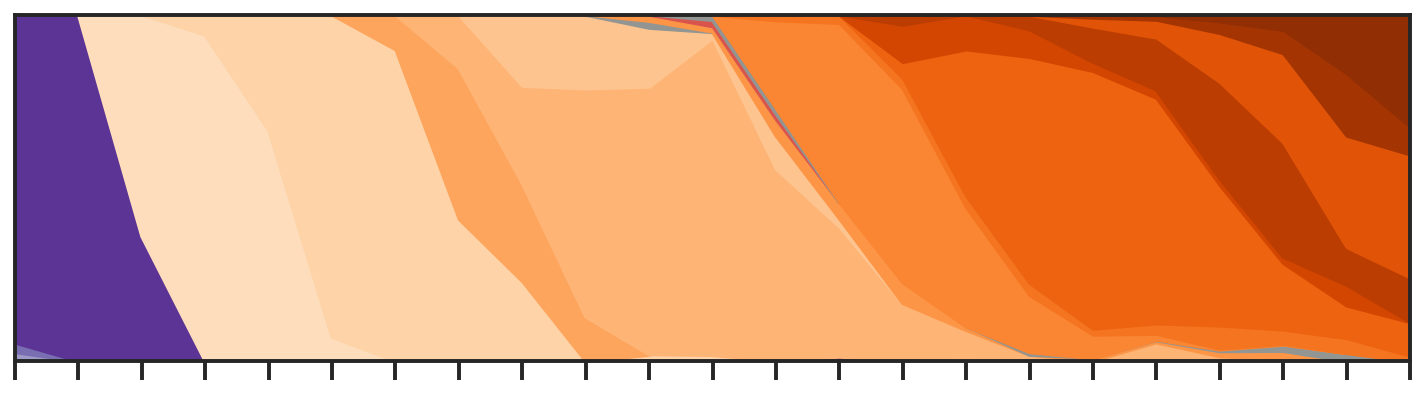

In [51]:
fig, ax = plt.subplots(figsize=(12, 3))

fish_plot(*data, ax=ax)

plt.yticks([])

names = sorted(r['name'].unique())

# plt.axvline(10,
#             color='xkcd:dark grey',
#             ls='dashed')
# plt.axvline(13,
#             color='xkcd:dark grey',
#             ls='dashed')
# plt.axvline(21,
#             color='xkcd:dark grey',
#             ls='dashed')
# plt.axvline(35,
#             color='xkcd:dark grey',
#             ls='dashed')

plt.xlabel('')

plt.xticks(range(len(names)),
           ['' for x in names],
           rotation=90,
           fontsize=14)

plt.savefig('update_7.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_7.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

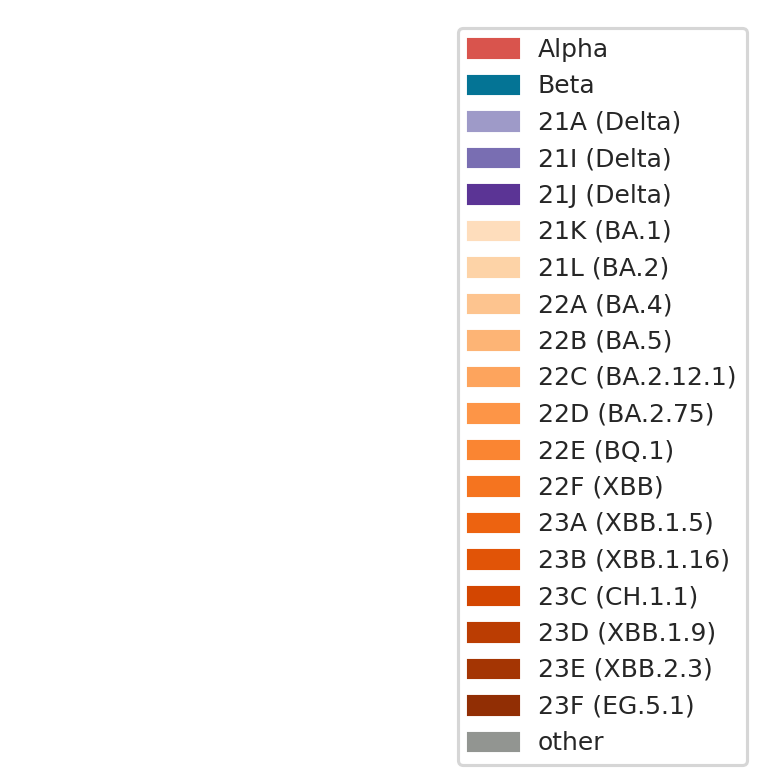

In [52]:
patches = []
for k, v in voc.items():
    if type(v) == str:
        if v != 'xkcd:grey':
            patch = mpatches.Patch(color=v, label=k)
            patches.append(patch)
    else:
        for k1, v1 in voc[k].items():
            patch = mpatches.Patch(color=v1, label=k1)
            patches.append(patch)

patch = mpatches.Patch(color='xkcd:grey', label='other')
patches.append(patch)

plt.legend(handles=patches, facecolor='w', fontsize=12, ncols=1)

plt.xticks([])
plt.yticks([])

sns.despine(left=True, bottom=True)

plt.savefig('update_7_legend.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_7_legend.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

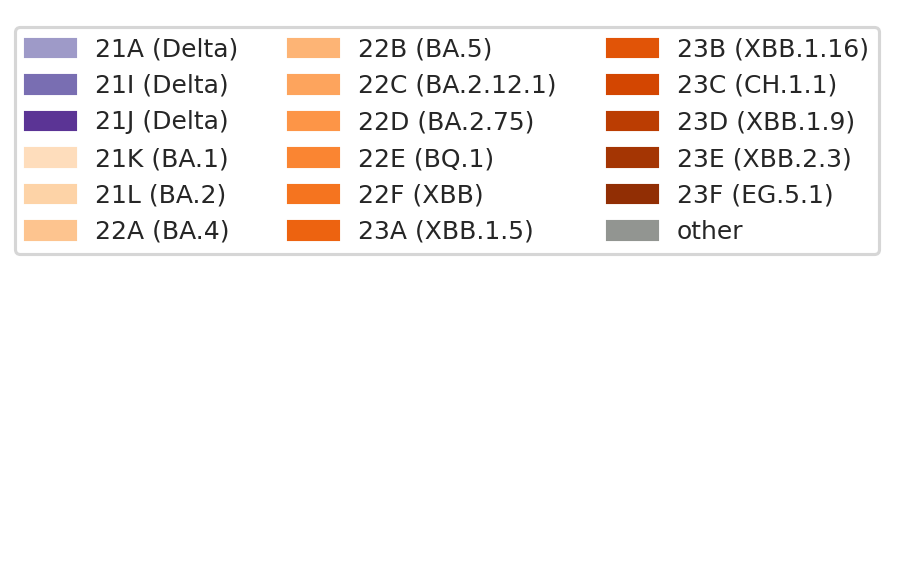

In [53]:
patches = []
for k, v in voc.items():
    if type(v) == str:
        if k in ['Alpha', 'Beta']:
            continue
        if v != 'xkcd:grey':
            patch = mpatches.Patch(color=v, label=k)
            patches.append(patch)
    else:
        for k1, v1 in voc[k].items():
            if k1 in ['Alpha', 'Beta']:
                continue
            patch = mpatches.Patch(color=v1, label=k1)
            patches.append(patch)

patch = mpatches.Patch(color='xkcd:grey', label='other')
patches.append(patch)

plt.legend(handles=patches, facecolor='w', fontsize=12, ncols=3)

plt.xticks([])
plt.yticks([])

sns.despine(left=True, bottom=True)

plt.savefig('update_7_legend_b.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_7_legend_b.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [54]:
s = df[(df['gene_source'] == 'S') & (df['gene_target'] == 'S') &
       (df['feature_codon_source'].isin([446, 460, 486,
                                         452, 490, 498,
                                         501])) &
       (df['feature_codon_target'].isin([446, 460, 486,
                                         452, 490, 498,
        501]))].copy()
s['feature_codon_source'] = s['feature_codon_source'].astype(int)
s['feature_codon_target'] = s['feature_codon_target'].astype(int)
s = s.set_index(['feature_codon_source',
                 'feature_codon_target',
                 'pos_source', 'pos_target'])

In [55]:
s_muts = {int(y) for _, _, y, _ in s.index}
o_muts = {int(y) for _, _, _, y in s.index}

# d_s_muts = {int(y): f'{int(z)}:{int(y)}' for z, _, y, _ in s.index}
# d_o_muts = {int(y): f'{int(z)}:{int(y)}' for _, z, _, y in s.index}
d_s_muts = {int(y): int(z) for z, _, y, _ in s.index}
d_o_muts = {int(y): int(z) for _, z, _, y in s.index}

d_muts = {**d_s_muts, **d_o_muts}

In [56]:
res = []
lsize = {}
for f in os.listdir('../out/update/time-lineages/'):
    try:
        l = pd.read_csv(f'../out/time-lineages/{f}', sep='\t',
                    usecols=['seqName', 'clade', 'Nextclade_pango',
                             'partiallyAliased', 'clade_nextstrain',
                             'clade_who', 'clade_display',
                             'substitutions', 'deletions', 'insertions',
                             'aaSubstitutions', 'aaDeletions', 'aaInsertions'])
    except:
        l = pd.read_csv(f'../out/update/time-lineages/{f}', sep='\t',
                    usecols=['seqName', 'clade', 'Nextclade_pango',
                             'partiallyAliased', 'clade_nextstrain',
                             'clade_who', 'clade_display',
                             'substitutions', 'deletions', 'insertions',
                             'aaSubstitutions', 'aaDeletions', 'aaInsertions'])
    date = f.split('.')[0]
    year = int(date.split('-')[0])
    month = int(date.split('-')[1])
    lsize[date] = l['seqName'].unique().shape[0]

    if date == '2020-02':
        continue

    for kind in ['substitutions', 'deletions', 'insertions']:
        for clade, line in l[['clade_display', kind]].values:
            if type(line) == float:
                continue
            for x in line.split(','):
                if '-' in x:
                    for v in range(int(x.split('-')[0]),
                                   int(x.split('-')[1]) + 1):
                        if v not in s_muts and v not in o_muts:
                            continue
                        res.append((date, clade, kind, v, d_muts[v]))
                else:
                    try:
                        v = int(x.split(':')[0])
                    except ValueError:
                        v = x
                        while True:
                            if len(v) == 0:
                                v = 0
                                print(x)
                                break
                            v = v[1:]
                            try:
                                v = int(v)
                            except ValueError:
                                v = v[:-1]
                                try:
                                    v = int(v)
                                except ValueError:
                                    continue
                            break
                    if v in d_muts:
                        res.append((date, clade, kind, v, d_muts[v]))

In [57]:
r = pd.DataFrame(res,
                 columns=['name', 'clade', 'kind', 'position', 'fingerprint'])

In [58]:
t = r.groupby(['name', 'position', 'fingerprint'])['clade'].count().reset_index()
t['proportion'] = [y / lsize[x] for x, y in t[['name', 'clade']].values]

In [59]:
t['fingerprint'].unique()

array([452, 446, 460, 490, 501, 486, 498])

In [60]:
u = r.groupby(['name', 'fingerprint'])['clade'].count().reset_index()
u['proportion'] = [y / lsize[x] for x, y in u[['name', 'clade']].values]
u.loc[u[u['proportion'] > 1].index,
      'proportion'] = 1

In [61]:
aa = set([446, 460, 486,
          452, 490])

In [62]:
res = []
for name in months:
    for mut in aa.difference(u[u['name'] == name]['fingerprint'].unique()):
        res.append([name, mut, 0, 0.])
res = pd.DataFrame(res, columns=['name', 'fingerprint',
                                 'clade', 'proportion'])
u = pd.concat([u, res])

In [63]:
u = u[u['name'].isin(months)]

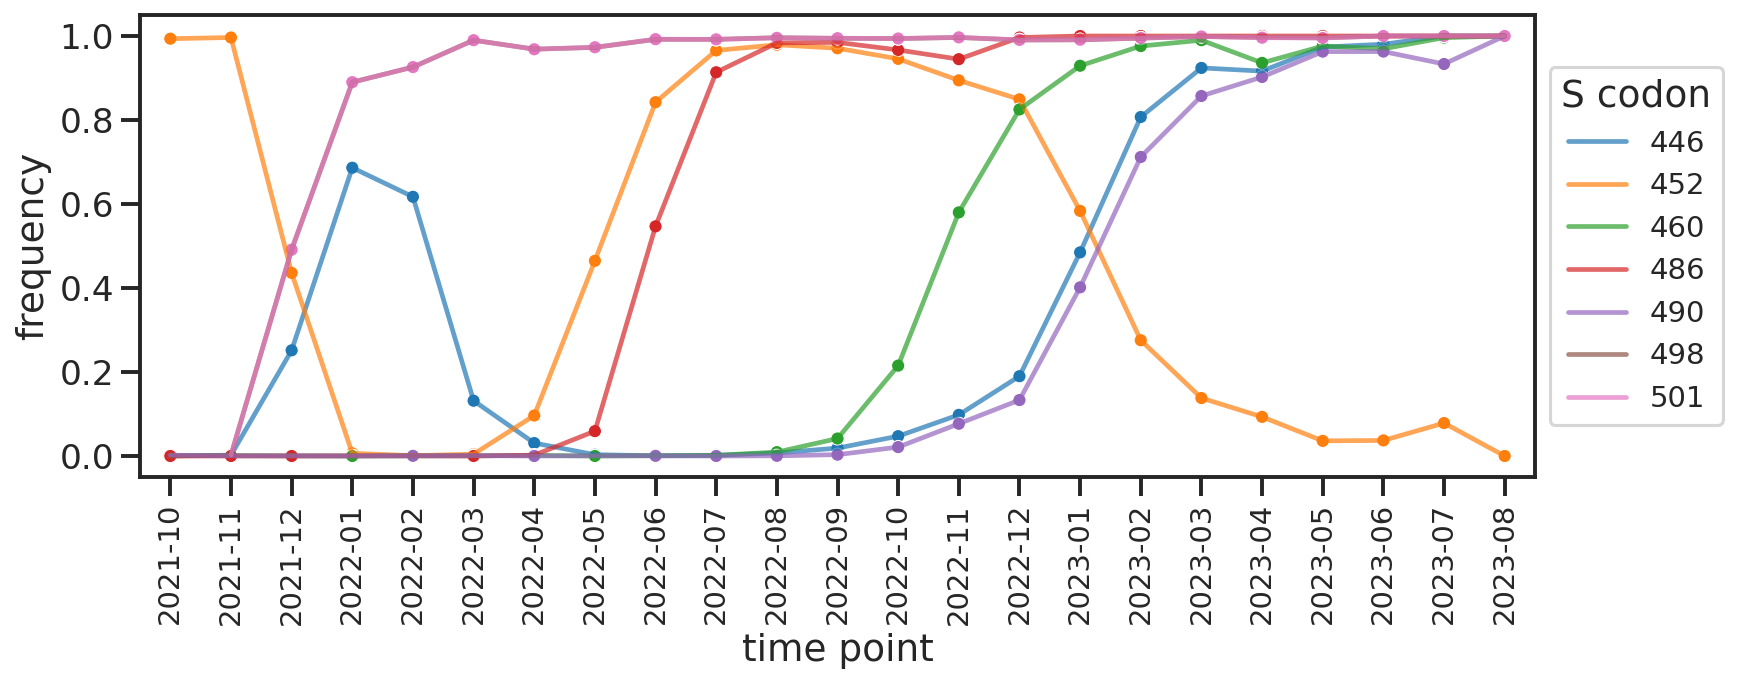

In [64]:
plt.figure(figsize=(12, 4))

sns.lineplot(data=u,
             x='name', y='proportion',
             hue ='fingerprint',
             # hue_order=['S:681:23604', 'N:203:28881', 'M:82:26767', 'ORF3a:26:25469'],
             palette='tab10',
             alpha=0.7)
sns.scatterplot(data=u,
                x='name', y='proportion',
                hue ='fingerprint',
                # hue_order=['S:681:23604', 'N:203:28881', 'M:82:26767', 'ORF3a:26:25469'],
                palette='tab10',
                size=10,
                legend=None)

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w', fontsize=14, title='S codon',
           ncol=1,
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.ylabel('frequency')
plt.xlabel('time point')

plt.xlim(-0.5, len(months) - 0.5)

plt.savefig('update_8.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_8.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [65]:
aa = set(['G446S',
          'L452Q',
          'L452R',
          'N460H',
          'F486I',
          'F486S', 'F486V',
          'F490S',
          'F490P'
         ])

In [66]:
res = []
lsize = {}
for f in os.listdir('../out/update/time-lineages/'):
    try:
        l = pd.read_csv(f'../out/time-lineages/{f}', sep='\t',
                    usecols=['seqName', 'clade', 'Nextclade_pango',
                             'partiallyAliased', 'clade_nextstrain',
                             'clade_who', 'clade_display',
                             'substitutions', 'deletions', 'insertions',
                             'aaSubstitutions', 'aaDeletions', 'aaInsertions'])
    except:
        l = pd.read_csv(f'../out/update/time-lineages/{f}', sep='\t',
                    usecols=['seqName', 'clade', 'Nextclade_pango',
                             'partiallyAliased', 'clade_nextstrain',
                             'clade_who', 'clade_display',
                             'substitutions', 'deletions', 'insertions',
                             'aaSubstitutions', 'aaDeletions', 'aaInsertions'])
    date = f.split('.')[0]
    year = int(date.split('-')[0])
    month = int(date.split('-')[1])
    lsize[date] = l['seqName'].unique().shape[0]

    if date == '2020-02' or date not in months:
        continue
    for i, data in l[['clade_display', 'aaSubstitutions']].iterrows():
        aas = {x for x in data.loc['aaSubstitutions'].split(',') if x.split(':')[0] == 'S' and x.split(':')[1] in aa}
        for mut in aas:
            res.append((date, data.loc['clade_display'], mut.split(':')[1]))
r = pd.DataFrame(res,
                 columns=['name', 'clade', 'mutation'])

In [67]:
u = r.groupby(['name', 'mutation'])['clade'].count().reset_index()
u['proportion'] = [y / lsize[x] for x, y in u[['name', 'clade']].values]
u.loc[u[u['proportion'] > 1].index,
      'proportion'] = 1

In [68]:
res = []
for name in months:
    for mut in aa.difference(u[u['name'] == name]['mutation'].unique()):
        res.append([name, mut, 0, 0.])
res = pd.DataFrame(res, columns=['name', 'mutation',
                                 'clade', 'proportion'])
u = pd.concat([u, res])

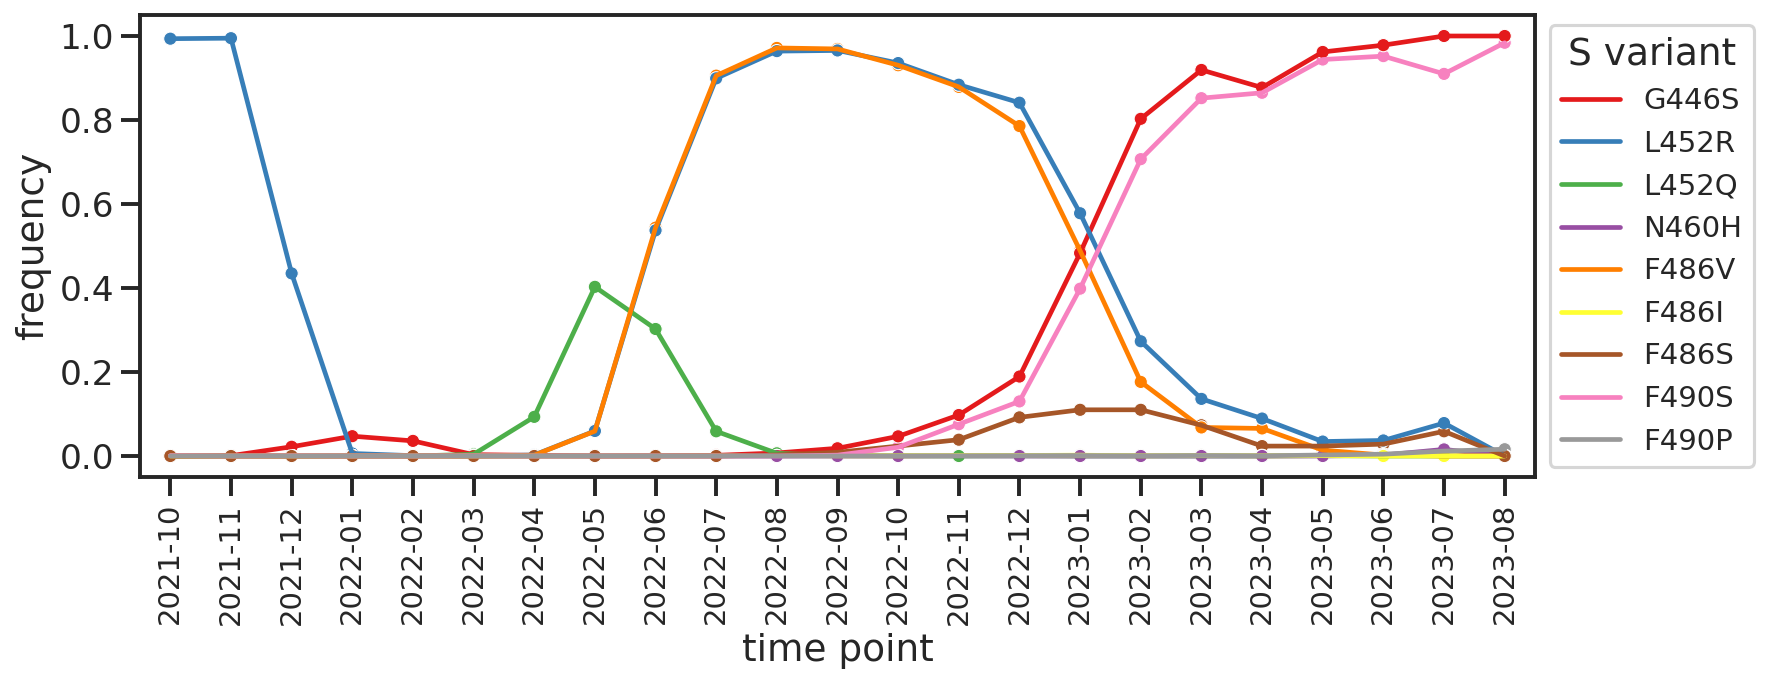

In [69]:
plt.figure(figsize=(12, 4))

sns.lineplot(data=u,
             x='name', y='proportion',
             hue ='mutation',
             hue_order=sorted(u['mutation'].unique(),
                              key=lambda x: int(x[1:-1])),
             palette='Set1')
sns.scatterplot(data=u,
                x='name', y='proportion',
                hue ='mutation',
                hue_order=sorted(u['mutation'].unique(),
                              key=lambda x: int(x[1:-1])),
                palette='Set1',
                size=10,
                legend=None)

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w', fontsize=14, title='S variant',
           ncol=1,
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.ylabel('frequency')
plt.xlabel('time point')

plt.xlim(-0.5, len(months) - 0.5)

plt.savefig('update_9.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_9.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);

In [70]:
aa = set(['G446S',
          'L452R',
          'N460H',
          'F486S',
          'F486V',
          'F490S',
         ])

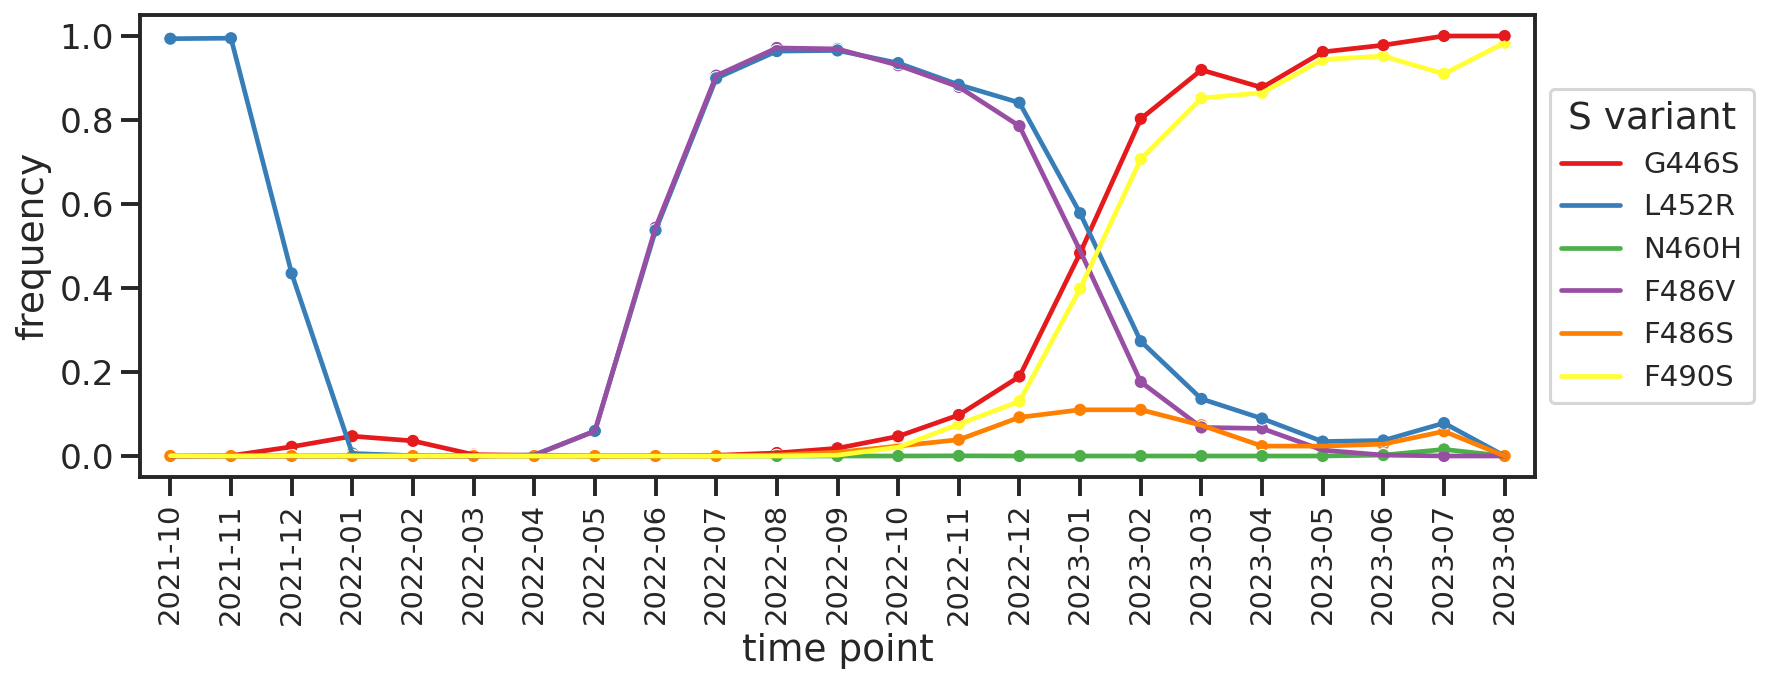

In [71]:
plt.figure(figsize=(12, 4))

sns.lineplot(data=u[u['mutation'].isin(aa)],
             x='name', y='proportion',
             hue ='mutation',
             hue_order=sorted(aa,
                              key=lambda x: int(x[1:-1])),
             palette='Set1')
sns.scatterplot(data=u[u['mutation'].isin(aa)],
                x='name', y='proportion',
                hue ='mutation',
                hue_order=sorted(aa,
                              key=lambda x: int(x[1:-1])),
                palette='Set1',
                size=10,
                legend=None)

plt.xticks(rotation=90,
           size=14)

plt.legend(facecolor='w', fontsize=14, title='S variant',
           ncol=1,
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.ylabel('frequency')
plt.xlabel('time point')

plt.xlim(-0.5, len(months) - 0.5)

plt.savefig('update_10.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('update_10.svg',
            dpi=300,
            bbox_inches='tight',
            transparent=True);